# Project-Walmart


In [33]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()


In [34]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Walmart_Store_sales.csv')

In [35]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [36]:
holiday = pd.read_csv('Holiday.csv')
from datetime import date, time, datetime
holiday["Holiday"] = holiday["Day"].astype(str) + "-" + holiday["Month"].astype(str) + "-" + holiday["Year"].astype(str)  
holiday["Holiday"] = pd.to_datetime(holiday["Holiday"], format="%d-%b-%Y")
holiday = holiday.loc[:,["Event","Holiday"] ]
holiday.head()

,Event,Holiday
0,Super Bowl,2010-02-12
1,Super Bowl,2011-02-11
2,Super Bowl,2012-02-10
3,Super Bowl,2013-02-08
4,Labour Day,2010-09-10


In [38]:
from datetime import date, time, datetime
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

In [39]:
data["Holiday"] = data["Date"]

In [40]:
d = pd.merge(data,holiday,on="Holiday",how="left")
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,Event
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,NaN
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,NaN


In [41]:
d['Event'].unique()

array([nan, 'Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas'],
      dtype=object)

In [76]:
#d["Holiday_Flag"] = np.where(panu["Event"].isnull() ,"No","Yes")
d["Holiday_Flag"] = np.where(d["Event"].isnull() ,"No","Yes")
#d.drop(["Holiday","Event"],axis=1,inplace=True)
d.drop(["Holiday"],axis=1,inplace=True)

In [78]:
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [45]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Holiday       6435 non-null   datetime64[ns]
 9   Event         450 non-null    object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 553.0+ KB


## Which store has maximum sales?

In [79]:
store = d.groupby("Store")["Weekly_Sales"].sum()
store = pd.DataFrame(store)
store = store.sort_values("Weekly_Sales",ascending=0)
store.head(3)
# Store No. 20 has maximum sales

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08


## Which store has maximum standard deviation?

In [80]:
store = d.groupby("Store")["Weekly_Sales"].std()
store = pd.DataFrame(store)
store = store.sort_values("Weekly_Sales",ascending=0)
store.head(3)
# Store No. 14 has maximum standard deviation

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742


## 	Which store/s has good quarterly growth rate in Q3’2012?

In [81]:
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [82]:
import datetime as dt
import pandas as pd
d["qtr"] =  d["Date"].dt.to_period('Q')

In [83]:
d["qtr"].unique()

<PeriodArray>
['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3',
 '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4']
Length: 12, dtype: period[Q-DEC]

In [84]:
joyita = d.loc[(d["qtr"] == "2012Q2") | (d["qtr"] == "2012Q3"),]

In [85]:
joyita.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
113,1,2012-04-06,1899676.88,No,70.43,3.891,221.435611,7.143,NaN,2012Q2,4,2012,H1,114
114,1,2012-04-13,1621031.70,No,69.07,3.891,221.510210,7.143,NaN,2012Q2,4,2012,H1,115
115,1,2012-04-20,1521577.87,No,66.76,3.877,221.564074,7.143,NaN,2012Q2,4,2012,H1,116


In [86]:
j = pd.pivot_table(joyita,index="Store",columns="qtr",values="Weekly_Sales",aggfunc=np.sum  )
j["growth"] = ((j["2012Q3"] - j["2012Q2"])/j["2012Q2"])*100
j=j.sort_values("growth",ascending=0)
j.head(10)
# Store 7 and 16 has good growth rate of 13.3% and 8.4% respectively

qtr,2012Q2,2012Q3,growth
Store,,,
7,7290859.27,8262787.39,13.330776
16,6564335.98,7121541.64,8.488378
35,10838313.00,11322421.12,4.466637
26,13155335.57,13675691.91,3.955478
39,20214128.46,20715116.23,2.478404
41,17659942.73,18093844.01,2.456980
44,4306405.78,4411251.16,2.434638
24,17684218.91,17976377.72,1.652088
40,12727737.53,12873195.37,1.142841


## 	Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [87]:
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [90]:
# Mean sales in non-holiday for all stores
mean_sales = d.loc[d["Holiday_Flag"] == "No","Weekly_Sales"].mean()

In [91]:
mean_sales

1041256.3802088564

In [92]:
ealina = d.groupby("Event")["Weekly_Sales"].mean()
ealina = pd.DataFrame(ealina)
ealina

,Weekly_Sales
Event,
Christmas,9.608331e+05
Labour Day,1.042427e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


In [93]:
ealina.loc[ealina["Weekly_Sales"] > mean_sales,]
# ThanksGiving is having higher mean sales than average non holiday sales

,Weekly_Sales
Event,
Labour Day,1.042427e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


## 	Provide a monthly and semester view of sales in units and give insights

In [94]:
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [95]:
import datetime as dt
import pandas as pd
d["month"] =  d["Date"].dt.month
d["year"] =  d["Date"].dt.year
d["semester"] = np.where(d["Date"].dt.month.le(6), 'H1', 'H2')
# assuming semester is half of a year

<AxesSubplot:xlabel='year,month'>

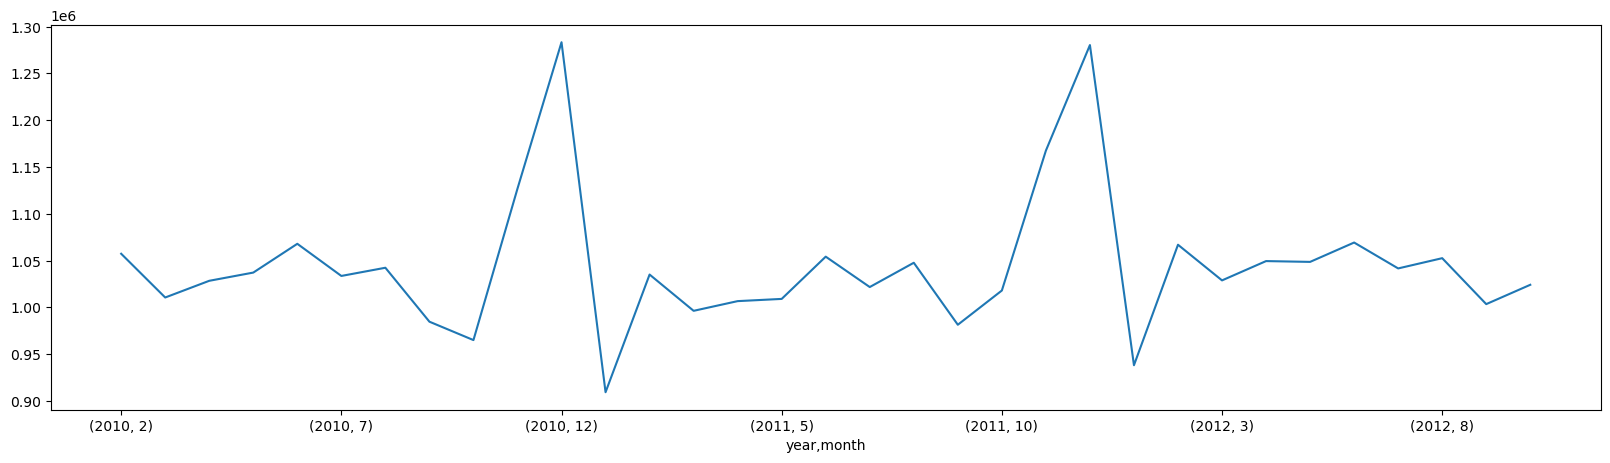

In [96]:
#d.groupby("month")["Weekly_Sales"].sum()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 5)
d.groupby( ["year","month"])["Weekly_Sales"].mean().plot()
# clear spikes are visible for 2 period

<AxesSubplot:xlabel='year,semester'>

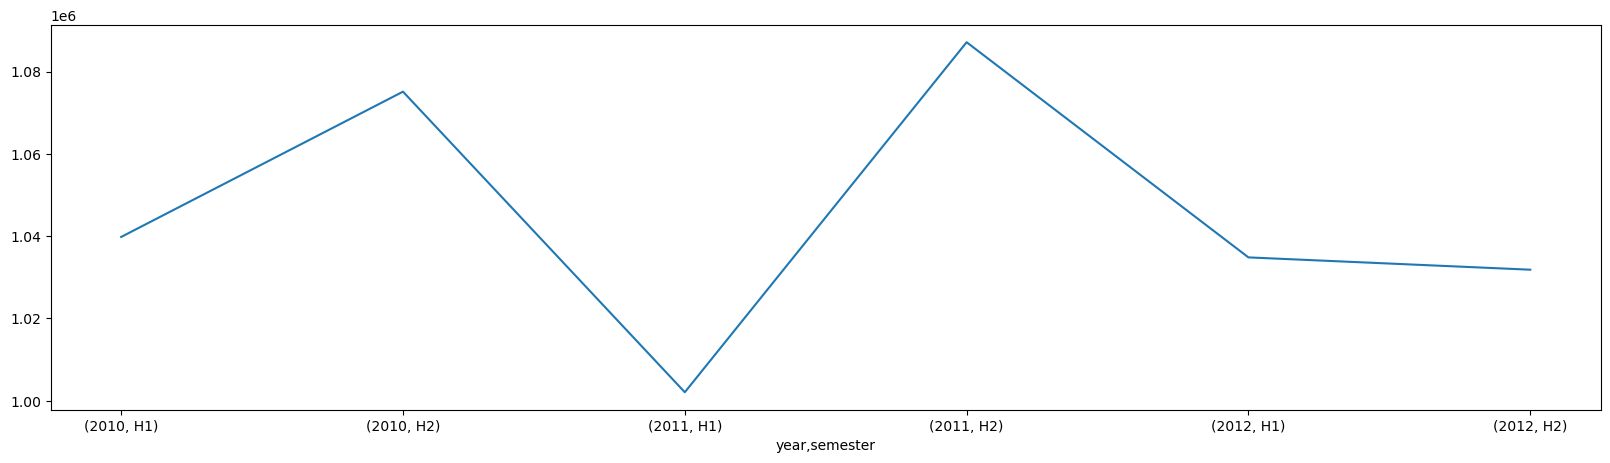

In [97]:
plt.rcParams["figure.figsize"] = (20, 5)
d.groupby( ["year","semester"])["Weekly_Sales"].mean().plot()
#seems like a seasonal pattarn

## 	Linear Regression

In [98]:
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [99]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
d["new_date"] = d["Date"]
d.new_date = le.fit_transform(d.new_date)+1
d.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Event,qtr,month,year,semester,new_date
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,NaN,2010Q1,2,2010,H1,1
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,Super Bowl,2010Q1,2,2010,H1,2
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,NaN,2010Q1,2,2010,H1,3
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,NaN,2010Q1,2,2010,H1,4
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,NaN,2010Q1,3,2010,H1,5


In [100]:
import statsmodels.formula.api as sm
rock=sm.ols(formula=
"Weekly_Sales ~ CPI +  Unemployment + Fuel_Price ",data=data).fit()
rock.summary()# shows total summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     51.75
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.81e-33
Time:                        23:11:18   Log-Likelihood:                -94275.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.746e+06   7.96e+04     21.938      0.000    1.59e+06     1.9e+06
CPI          -1696.8760    188.793     -8.988      0.000   -2066.973   -1326.779
Unemployment -4.286e+04   3905.197    -10.975      0.000   -5.05e+04   -3.52e+04
Fuel_Price   -1.927e+04   1.54e+04     -1.248      0.212   -4.95e+04     1.1e+04
==============================================================================
Omnibus:                      370.117   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.792
Skew:                           0.638   Prob(JB):                     1.42e-95
Kurtosis:                       3.051   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#predicting the outcomes
data["pred"] = rock.predict()
var = pd.DataFrame(round(rock.pvalues,3))# shows p value
rock.rsquared
var["coeff"] = rock.params#coefficients

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = rock.model.exog #.if I had saved data as rock
# this it would have looked like rock.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
var["vif"] = vif
var

,0,coeff,vif
Intercept,0.000,1.745657e+06,130.951193
CPI,0.000,-1.696876e+03,1.141629
Unemployment,0.000,-4.285920e+04,1.109722
Fuel_Price,0.212,-1.926614e+04,1.038744


In [102]:
###### mape
data["mp"] = abs((data["Weekly_Sales"] - data["pred"])/data["Weekly_Sales"])
(data.mp.mean())*100#mape


66.36719946418746

A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy 